### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [2]:
fat1 = loja["Preço"].sum()
fat2 = loja2["Preço"].sum()
fat3 = loja3["Preço"].sum()
fat4 = loja4["Preço"].sum()

print(f"Loja 1: {fat1}")
print(f"Loja 2: {fat2}")
print(f"Loja 3: {fat3}")
print(f"Loja 4: {fat4}")

Loja 1: 1534509.12
Loja 2: 1488459.06
Loja 3: 1464025.03
Loja 4: 1384497.58


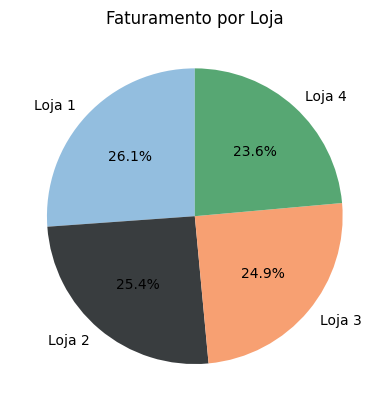

In [3]:
import matplotlib.pyplot as plt

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

faturamentos = [fat1, fat2, fat3, fat4]

cores = ["#93BEDF", "#393D3F", "#F7A072", "#57A773"]

plt.pie(faturamentos, labels=lojas, autopct="%.1f%%", startangle=90, colors=cores)
plt.title("Faturamento por Loja")
plt.show()


# 2. Vendas por Categoria

In [4]:
loja["loja"] = "Loja 1"
loja2["loja"] = "Loja 2"
loja3["loja"] = "Loja 3"
loja4["loja"] = "Loja 4"

todas_lojas = pd.concat([loja, loja2, loja3, loja4])
todas_lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [5]:
qtd_por_categoria = todas_lojas.groupby(["loja", "Categoria do Produto"]).size().reset_index(name="número de vendas")
qtd_por_categoria.head()

,loja,Categoria do Produto,número de vendas
0,Loja 1,brinquedos,324
1,Loja 1,eletrodomesticos,312
2,Loja 1,eletronicos,448
3,Loja 1,esporte e lazer,284
4,Loja 1,instrumentos musicais,182


In [6]:
mais_populares = (
    qtd_por_categoria
    .sort_values(["loja", "número de vendas"], ascending=[True, False])
    .groupby("loja", as_index=False)
    .head(1)
)

print(mais_populares)

      loja Categoria do Produto  número de vendas
6   Loja 1               moveis               465
14  Loja 2               moveis               442
22  Loja 3               moveis               499
30  Loja 4               moveis               480


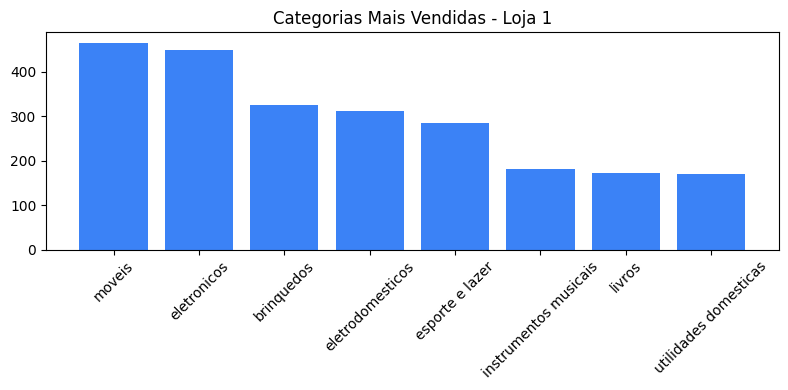

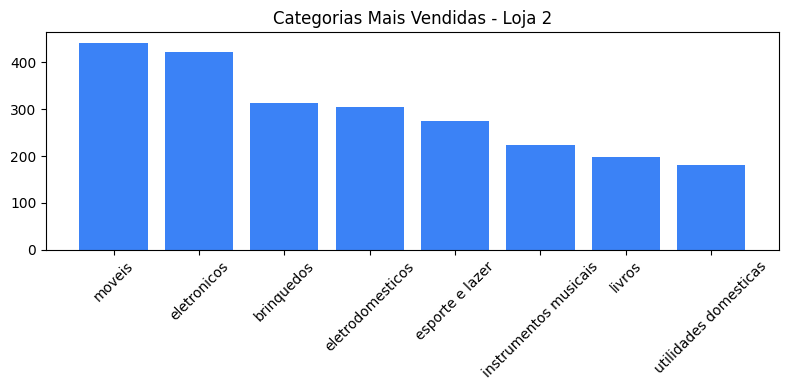

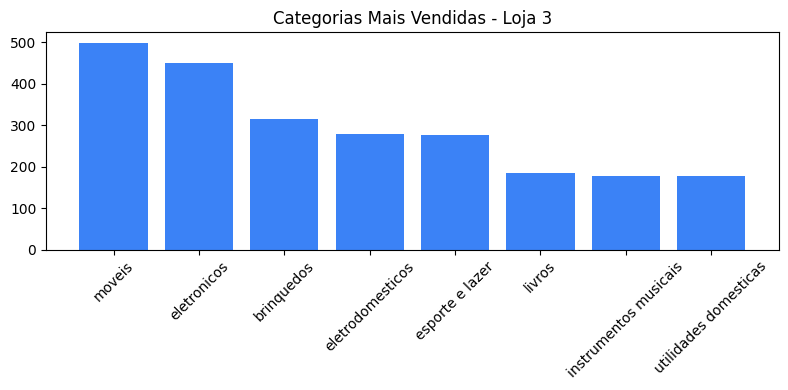

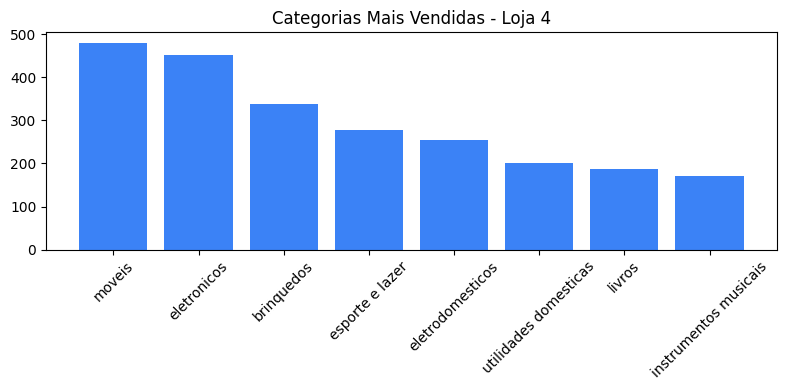

In [7]:
for loja_nome, grupo in todas_lojas.groupby("loja"):
    vendas_categoria = grupo.groupby("Categoria do Produto")["Preço"].count().reset_index()
    vendas_categoria.rename(columns={"Preço": "Vendas"}, inplace=True)
    vendas_categoria.sort_values(by="Vendas", ascending=False, inplace=True)

    plt.figure(figsize=(8,4))
    plt.bar(vendas_categoria["Categoria do Produto"], vendas_categoria["Vendas"], color="#3b82f6")
    plt.title(f"Categorias Mais Vendidas - {loja_nome}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Média de Avaliação das Lojas


In [8]:
media_avaliacoes = todas_lojas.groupby("loja")["Avaliação da compra"].mean().reset_index()
media_avaliacoes.rename(columns={"Avaliação da compra": "Média das Avaliações"}, inplace=True)

print(media_avaliacoes)

     loja  Média das Avaliações
0  Loja 1              3.976685
1  Loja 2              4.037304
2  Loja 3              4.048326
3  Loja 4              3.995759


# 4. Produtos Mais e Menos Vendidos

In [9]:
vendas_por_produto = todas_lojas.groupby(["loja", "Produto"])["Preço"].count().reset_index()
vendas_por_produto.rename(columns={"Preço": "Quantidade Vendida"}, inplace=True)

In [10]:
mais_vendidos = vendas_por_produto.loc[vendas_por_produto.groupby("loja")["Quantidade Vendida"].idxmax()]
menos_vendidos = vendas_por_produto.loc[vendas_por_produto.groupby("loja")["Quantidade Vendida"].idxmin()]

print("Mais vendidos:\n", mais_vendidos)
print("\nMenos vendidos:\n", menos_vendidos)

Mais vendidos:
        loja                   Produto  Quantidade Vendida
24   Loja 1             Guarda roupas                  60
79   Loja 2  Iniciando em programação                  65
134  Loja 3             Kit banquetas                  57
161  Loja 4                  Cama box                  62

Menos vendidos:
        loja            Produto  Quantidade Vendida
11   Loja 1       Celular ABXY                  33
82   Loja 2  Jogo de tabuleiro                  32
105  Loja 3   Blocos de montar                  35
178  Loja 4           Guitarra                  33


# 5. Frete Médio por Loja

In [11]:
media_frete = todas_lojas.groupby("loja")["Frete"].mean().reset_index()
media_frete.rename(columns={"Frete": "Custo Médio de Frete"}, inplace=True)

print(media_frete)

     loja  Custo Médio de Frete
0  Loja 1             34.691805
1  Loja 2             33.621941
2  Loja 3             33.074464
3  Loja 4             31.278997


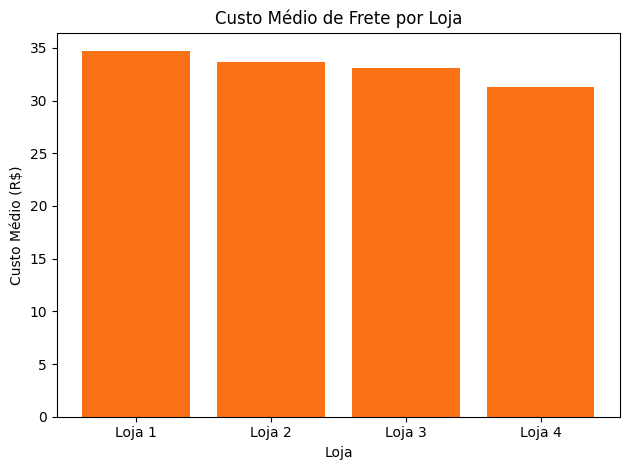

In [12]:
import matplotlib.pyplot as plt

plt.bar(media_frete["loja"], media_frete["Custo Médio de Frete"], color="#f97316")
plt.title("Custo Médio de Frete por Loja")
plt.xlabel("Loja")
plt.ylabel("Custo Médio (R$)")
plt.tight_layout()
plt.show()

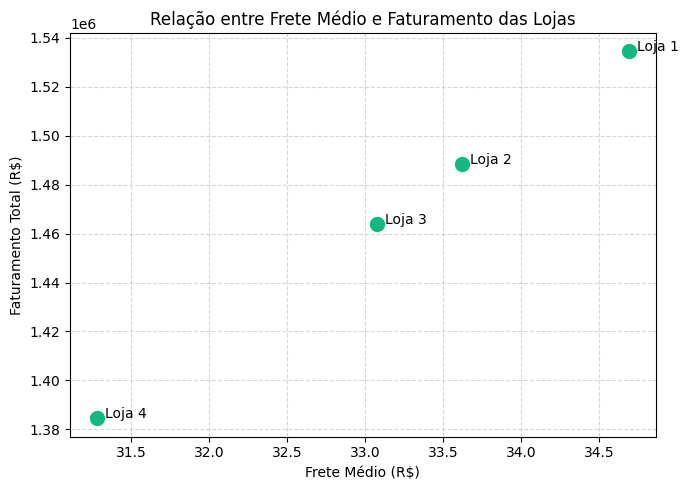

In [13]:
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]
frete = [34.6918, 33.6219, 33.0744, 31.2789]

plt.figure(figsize=(7,5))
plt.scatter(frete, faturamento, color="#10b981", s=100)

for i, nome in enumerate(lojas):
    plt.text(frete[i]+0.05, faturamento[i], nome)

plt.title("Relação entre Frete Médio e Faturamento das Lojas")
plt.xlabel("Frete Médio (R$)")
plt.ylabel("Faturamento Total (R$)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Desempenho Geográfico

In [16]:
todas_lojas = todas_lojas.dropna(subset=['lat', 'lon'])

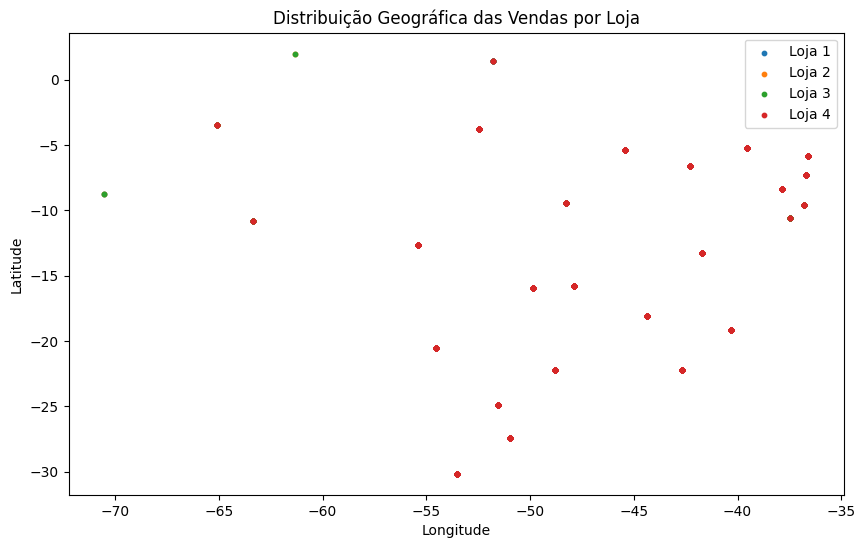

In [17]:
plt.figure(figsize=(10, 6))

for loja in todas_lojas['loja'].unique():
    dados_loja = todas_lojas[todas_lojas['loja'] == loja]
    plt.scatter(dados_loja['lon'], dados_loja['lat'], label=f'{loja}', s=10)

plt.title('Distribuição Geográfica das Vendas por Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

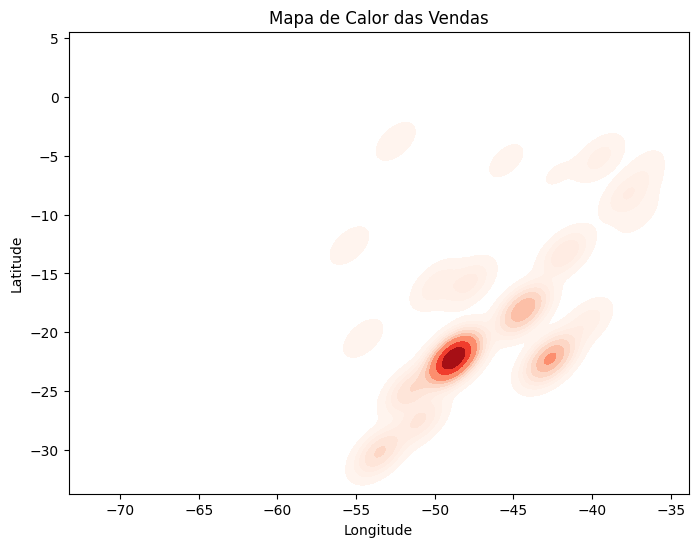

In [18]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.kdeplot(
    x=todas_lojas['lon'],
    y=todas_lojas['lat'],
    fill=True,
    cmap='Reds',
    thresh=0.05
)
plt.title('Mapa de Calor das Vendas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Relatório

Este relatório tem como objetivo apresentar a análise das lojas
Sr. João, identificando qual delas apresenta menor potencial de retorno e assim, indicada para a venda.

Foram considerados os seguintes indicadores: faturamento total, categorias de produtos mais e menos vendidas, média das avaliações dos clientes, produtos mais e menos vendidos e custo médio de frete.

---

## 1. Faturamento Total das Lojas

A análise de faturamento mostrou que:

**Loja 1:** R$ 1.534.509,12 (26,1%)

**Loja 2:** R$ 1.488.459,06 (25,4%)

**Loja 3:** R$ 1.464.025,03 (24,9%)

**Loja 4:** R$ 1.384.497,58 (23,6%)  

A Loja 1 apresenta o maior faturamento, enquanto a Loja 4 possui o menor. Logo, indica uma menor movimentação comercial na Loja 4.

## 2. Categorias de Produtos

Em todas as lojas, a categoria **móveis** foi a mais vendida.  
Isso mostra um padrão de consumo bastante homogêneo, sem grande variação entre as unidades.  

## 3. Avaliações dos Clientes

As médias de avaliação foram as seguintes:

| Loja | Média das Avaliações |
|------|-----------------------|
| Loja 1 | 3,9766 |
| Loja 2 | 4,0373 |
| Loja 3 | 4,0483 |
| Loja 4 | 3,9957 |

Todas as lojas mantêm um bom nível de satisfação dos clientes, com médias próximas de 4.  
A Loja 3 teve o melhor índice, enquanto a Loja 1 apresentou o menor.  
As diferenças, no entanto, são pequenas e não representam um problema relevante de qualidade.

## 4. Produtos Mais e Menos Vendidos

| Loja | Produto Mais Vendido | Produto Menos Vendido |
|------|----------------------|-----------------------|
| Loja 1 | Guarda-roupas | Celular ABXY |
| Loja 2 | Iniciando em Programação | Jogo de Tabuleiro |
| Loja 3 | Kit Banquetas | Blocos de Montar |
| Loja 4 | Cama Box | Guitarra |

Os produtos mais vendidos estão diretamente ligados à categoria de móveis, reforçando a predominância desse segmento nas vendas.  
Os produtos menos vendidos, por outro lado, mostram uma variedade maior, indicando que há itens que não têm boa aceitação em cada loja.

## 5. Frete Médio

O custo médio de frete por loja foi o seguinte:

| Loja | Frete Médio (R$) |
|------|-------------------|
| Loja 1 | 34,69 |
| Loja 2 | 33,62 |
| Loja 3 | 33,07 |
| Loja 4 | 31,27 |

Observa-se que as lojas com frete mais caro não necessariamente vendem menos.  
A Loja 1, por exemplo, tem o maior frete e também o maior faturamento, o que indica que o valor do frete não é um fator determinante nas vendas.

## 6. Análise geográfica

A análise geográfica mostra que as vendas das quatro lojas estão concentradas em regiões semelhantes, com leve predominância da Loja 1 em áreas de maior densidade de clientes. Apesar disso, não foram observadas diferenças regionais significativas que expliquem o menor desempenho da Loja 4, sugerindo que fatores comerciais (como mix de produtos e estratégias de venda) têm impacto maior que a localização geográfica.

---

## Conclusão

Após a análise dos dados, a **Loja 4** é a candidata mais adequada para ser vendida.  
Apesar de apresentar o menor frete médio e uma avaliação de clientes satisfatória, seu desempenho geral é consistentemente inferior em todos os demais aspectos:

1. **Menor faturamento absoluto e percentual**, indicando menor retorno financeiro.  
2. **Baixa diversificação de produtos**, com concentração em poucos itens da categoria de móveis.  
3. **Ausência de diferenciais competitivos**, seja em preço, volume de vendas ou variedade.  
4. **Indicadores de satisfação apenas medianos**, sem compensar o desempenho financeiro inferior.

A manutenção dessa loja representaria menor margem de lucro e potencial de crescimento reduzido, enquanto as demais apresentam indicadores mais equilibrados e sustentáveis.  
Por esse motivo, a recomendação técnica é que **a Loja 4 seja vendida**, concentrando esforços nas três lojas restantes, que apresentam maior retorno e estabilidade operacional.


